In [1]:
#import nilearn as nil
#from nilearn import plotting
import nibabel as nib
import glob
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
html_begin='''
<html>
<body>
'''

html_end='''
</body>
</html>'''

In [3]:
#sub = '/media/raid/orco/data/ICH/sub-0023/ses-01/anat/sub-0023_ses-01_space-native_desc-CT.nii.gz'
sub = '/home/orco/data/ICH/sub-0011/ses-01/anat/sub-0011_ses-01_space-native_desc-CT.nii.gz'
os.path.isfile(sub)

True

In [4]:
def sub2roi(i):
    return i.replace('/ICH/', '/ICH/derivatives/groundtruth_ICH_IVH_PHE_masks/').replace('_space-native_desc-CT.nii.gz', '_space-native_desc-fusion-ICH-PHE-IVH_mask.nii.gz')

In [5]:
def thres_ct(ct_fil, vmin=0, vmax=100):
    import nibabel as nib
    import numpy as np
    ct_nii = nib.load(ct_fil)
    ct_arr = ct_nii.get_fdata()
    ct_narr = np.where((ct_arr >=vmin) & (ct_arr <=vmax), ct_arr,0)
    return nib.Nifti1Image(ct_narr, ct_nii.affine)

In [6]:
def sub2info(i):
    return i.split('/')[-4], i.split('/')[-3]

In [7]:
# def gen_imgs(l):
#     if not l is list:
#         l = [l]
        
#     if not os.path.isdir('./imgs'):
#         os.makedirs('./imgs')
        
#     l_info = [sub2info(i) for i in l]
#     outs = []
#     errors = []
#     try:
#         for info,ct in zip(l_info,l):
#             anat_nii = thres_ct(ct)
#             roi_file = sub2roi(ct)
#             out_roi='./imgs/roi_{}_{}.png'.format(info[0], info[1])
#             out_anat='./imgs/anat_{}_{}.png'.format(info[0], info[1])
#             plotting.plot_roi(roi_file, anat_nii, display_mode='z', 
#                               cut_coords=tuple(range(-770,-750,4)),alpha=0.2, 
#                               output_file=out_roi)
#             plotting.plot_anat(anat_nii, dim=0, display_mode='z', 
#                                cut_coords=tuple(range(-770,-750,4)),
#                               output_file=out_anat)
#             outs.append({'sub':info[0], 'ses':info[1], 'roi':out_roi, 'anat':out_anat})
#     except:
#         errors.append({'sub':info[0], 'ses':info[1]})
#     return outs, errors

In [8]:
#def gen_imgs(l):
    

In [9]:
def subs2html(subs):
    outs, errors = gen_imgs(subs)
    with open('gallery.html', 'w') as html:
        html.write(html_begin)
        for i in outs:
            html.write('<h2>{} {}</h2>'.format(i['sub'], i['ses']))
            html.write('<img src="{anat}" alt="{anat}"></img>'.format(anat=i['anat']))
            html.write('<img src="{roi}" alt="{roi}"></img>'.format(roi=i['roi']))
        html.write(html_end)

In [10]:
#subs2html(sub)

In [11]:
#plotting.plot_roi(sub2roi(sub), thres_ct(sub), display_mode='z', cut_coords=tuple(range(-770,-750,4)),alpha=0.2)#, view_type='contours')

In [12]:
#plotting.plot_anat(thres_ct(sub,0,100), dim=0, display_mode='z', cut_coords=tuple(range(-770,-750,4)))#, view_type='contours')

In [27]:
from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('triple_cmap', colors= [(1, 0, 0), (0, 1, 0), (0,0,1)])

In [14]:
from scipy import ndimage

In [15]:
#fig, ax=plt.subplots(1,3)
#print('labels', np.unique(mask))




In [16]:
ct_img=nib.load(sub).get_fdata()


In [17]:
mask=nib.load(sub2roi(sub)).get_fdata() #.astype(np.int64)


In [28]:
""" get COG of coordinates """
lbl=ndimage.label(mask)[0]
cog=ndimage.measurements.center_of_mass(mask, lbl, [1,2,3])
#print(cog)


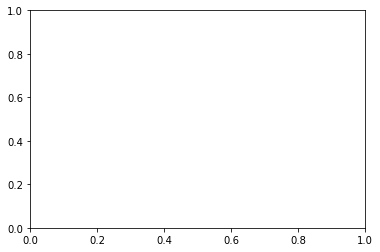

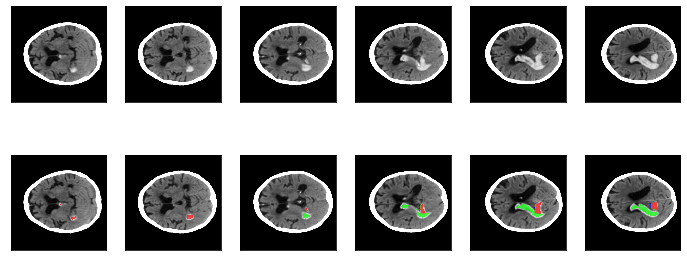

In [71]:
"""Create masked version of mask to avoid plotting 0 values"""
c = int(cog[0][2])
diff = int(c * 0.1)
l= list(range(c-3*diff, c+3*diff, diff))
fig, ax=plt.subplots(2,len(l))
for n,y in enumerate(l):
    unmasked_mask=mask[:, :, y]
    masked_mask=np.ma.masked_where(unmasked_mask==0, unmasked_mask)
    info = sub2info(sub)
    ax[0,n].set_xticklabels([])
    ax[0,n].set_xticks([])
    ax[0,n].set_yticklabels([])
    ax[0,n].set_yticks([])

    ax[0,n].imshow(ct_img[:, :, y], cmap='gray', alpha=1, vmin=0, vmax=80)
    ax[1,n].set_xticklabels([])
    ax[1,n].set_xticks([])
    ax[1,n].set_yticklabels([])
    ax[1,n].set_yticks([])

    ax[1,n].imshow(ct_img[:, :, y], cmap='gray', alpha=1, vmin=0, vmax=80)
    ax[1,n].imshow(masked_mask, cmap=cmap, alpha=0.7) 

plt.gcf().set_size_inches(12, 5)
#plt.title('{} {}'.format(info[0], info[1]))
#plt.show()
plt.savefig('./imgs/{}_{}.png'.format(info[0], info[1]))


In [ ]:
np.unique(masked_mask)

In [24]:
from matplotlib.pyplot import viridis

In [25]:
cmap = viridis()

<Figure size 432x288 with 0 Axes>

In [38]:
range(cog-2*diff, cog+2*diff, diff)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [42]:
c

16.03153153153153